Mini-projet : rétrograde de Mars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
df_mars = pd.read_csv('DataMars.csv', comment='#') #coordonnées de la position de Mars par rapport au centre de la Terre en fonction de la date entre 2015 et 2017

Le but de ce mini-projet est de construire un modèle reproduisant la rétrograde de Mars.
On utilisera un modèle bidimensionnel du mouvement de la Terre et de Mars autour du Soleil et on considérera le mouvement des deux planètes comme circulaire uniforme et contenu dans le plan de l’écliptique pour pouvoir représenter plus simplement le phénomène.
Pour construire ce modèle, nous utilisons les équations du mouvement x(t) et y(t) pour un mouvement circulaire uniforme.
On a : 
x(t)=R*cos(wt+phi)
y(t)=R*sin(wt+phi) 

Avec : 
   - x(t) et y(t) les coordonnées de la particule en fonction du temps t
   - R le rayon du cercle
   - w = 2*pi/T la fréquence angulaire, la période T
   - phi la phase à l'origine
   
Nous avons également les données suivantes : 
    - Rayon de l’orbite de la Terre : 1 UA
    - Période de révolution de la Terre : 365.256 jours
    - Rayon de l’orbite de Mars : 1.52371 UA
    - Période de révolution de Mars : 686.885 jours
    

In [3]:
t = np.linspace(0, 900, 900) #temps de 0j à 900j : durée écoulée entre le début et la fin de nos données sur le fichier DataMars.csv
phi0 = 0.1*np.ones_like(t) #phase initiale

#à partir des équations de mouvement : 
Terre = pd.DataFrame({"x(t)" : np.cos(2*np.pi*t/365.256), "y(t)" : np.sin(2*np.pi*t/365.256)})
Mars = pd.DataFrame({"x(t)" : 1.52371*np.cos(2*np.pi*t/686.885 + phi0), "y(t)" : 1.52371*np.sin(2*np.pi*t/686.885 + phi0)})


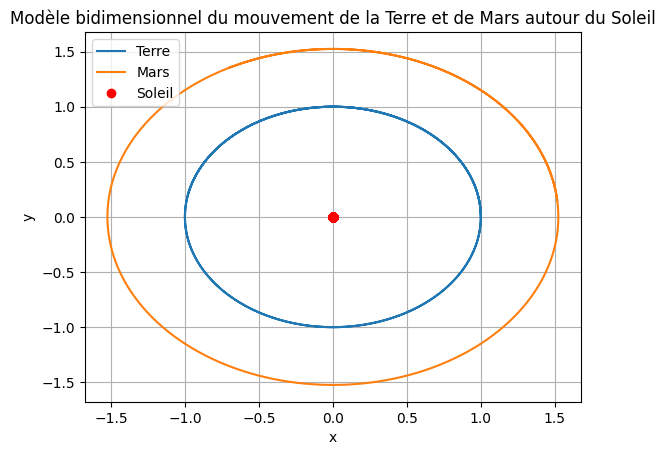

In [4]:
plt.plot(Terre["x(t)"], Terre["y(t)"]) #tracé de la Terre
plt.plot(Mars["x(t)"], Mars["y(t)"]) #tracé de Mars
plt.plot(np.zeros_like(t),np.zeros_like(t), "ro") #création d'un point rouge à la position (0,0)

plt.legend(["Terre","Mars","Soleil"]) #ajout de légendes

#nom des axes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Modèle bidimensionnel du mouvement de la Terre et de Mars autour du Soleil")

plt.grid() #ajout quadrillage
plt.show() #afficgage du tracé

On se place dans le référentiel géocentrique. Dans ce référentiel, la Terre reste immobile et c'est le mouvement apparent de Mars qui sera modifié.

In [5]:
Mars_terre = Mars - Terre

Pour calculer la longitude de Mars vu depuis la Terre, on utilise  la fonction numpy.arctan2(y, x) qui donne un résultat entre -pi et pi. On veut obtenir un résultat en deg°, on utilise donc la fontion np.degrees puis on rajoute 180° pour ne pas avoir de valeurs négatives.

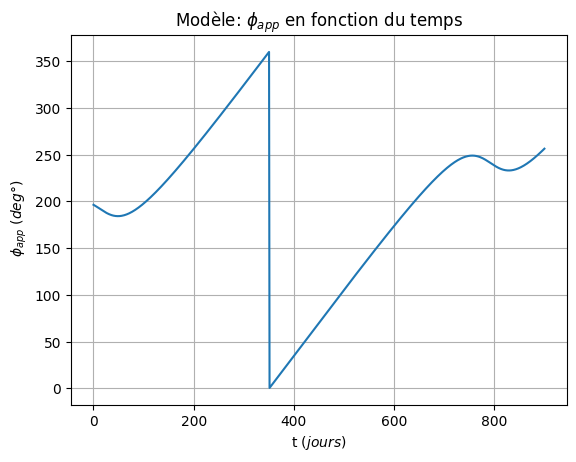

In [18]:
phi = np.degrees(np.arctan2(Mars_terre["y(t)"], Mars_terre["x(t)"])) + 180 #calcul de phi en deg°
plt.plot(t,phi) #tracé de la courbe

#nom des axes
plt.xlabel("t $(jours)$")
plt.ylabel(" $\phi_{app}$ $(deg°)$")

plt.title("Modèle: $\phi_{app}$ en fonction du temps") #ajout titre
plt.grid() #ajout quadrillage

La partie de la courbe qui nous intéresse se situe à partir de l'indice 600 environ. On ajuste donc la courbe en changeant l'intervalle de définiton.

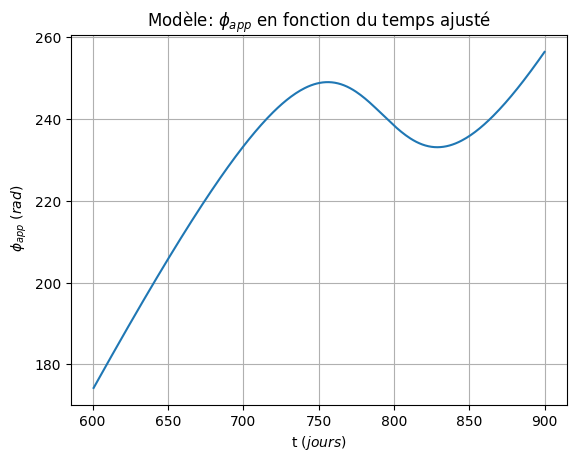

In [27]:
plt.plot(t[600:],phi[600:]) #sélection de l'intervalle
plt.xlabel("t $(jours)$")
plt.ylabel(" $\phi_{app}$ $(deg°)$")
plt.title("Modèle: $\phi_{app}$ en fonction du temps ajusté")
plt.grid()

Comparaison données-modèle : 

Les données fournies commencent au 01/03/2015 et se terminent le 18/08/2017, ce qui fait environ 900 jours. Comme le centre de la boucle peut s’observer à la date 25/05/2016, soit au bout de 451 jours de nos données, nous allons prendre les données qui nous intéressent, soient celles entre l'indice 300 et 700.

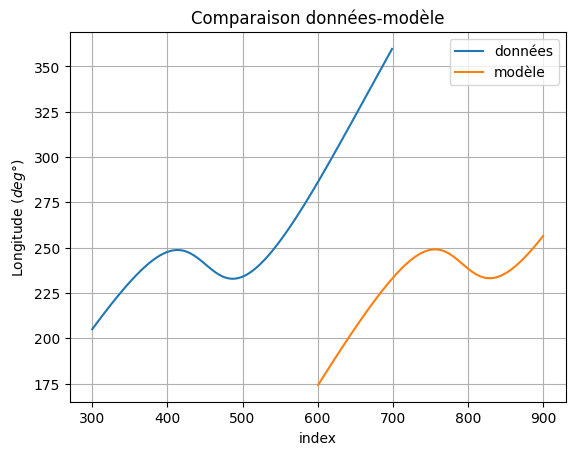

In [48]:
longitude = df_mars["Longitude (decimal)"][300:700] #sélection des longitudes entre l'indice 300 et 700

plt.plot(longitude) #affichage des données comprises entre les indices 300 et 700
plt.ylabel("Longitude $(deg°)$")
plt.xlabel("indices")


plt.plot(t[600:], phi[600:]) #affichage du modèle

plt.legend(["données","modèle"])
plt.grid()
plt.title("Comparaison données-modèle")

plt.show() #affichage du tracé


**REMARQUE** : les 2 courbes auraient normalement dû coincider, il y a un problème d'indices que je n'ai pas réussi à régler

In [ ]:
Conclusion : le modèle semble cohérent puisque les 2 courbes sembles pouvoir se superposer. Le mouvement de la rétrograde de Mars peut donc bien être reproduit par notre modèle.